# Cartoonifying Images and Videos
### Complete # TODO

# Requirements

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import os

In [35]:
def display_images_from_dict(images_dict, num_columns=3, size=5):
    titles = list(images_dict.keys())
    images = list(images_dict.values())
    num_rows = (len(images) + num_columns - 1) // num_columns 

    plt.figure(figsize=(size * num_columns, size * num_rows))

    for index, (title, image) in enumerate(zip(titles, images)):
        plt.subplot(num_rows, num_columns, index + 1)
        cmap = 'gray' if len(image.shape) == 2 else None
        plt.imshow(image, cmap=cmap)

        plt.title(title, fontsize=8)
        plt.axis('off')

    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.tight_layout(pad=0.1)
    plt.show()


# Cartoonify Function

In [36]:
def cartoonify(image):
    if image is None:
        return None

    grayScaleImage = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)

    getEdge = cv2.adaptiveThreshold(
        smoothGrayScale,
        maxValue=255,
        adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        thresholdType=cv2.THRESH_BINARY,
        blockSize=5,
        C=3
    )

    colorImage = cv2.bilateralFilter(
        src=image,
        d=9,
        sigmaColor=150,
        sigmaSpace=150
    )

    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    return cartoonImage


# Cartoonifying Images

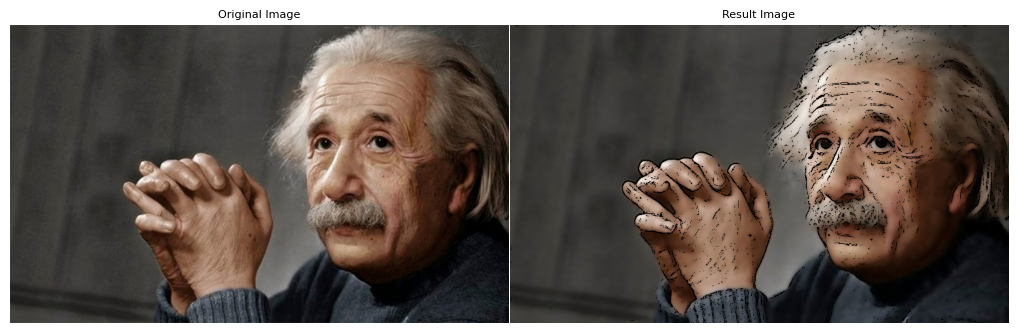

In [37]:
# Read the input image
# Define the path to the image file using os.path.join
image_path = os.path.join("images", "Einstein.jpeg")

# Read the input image
image = cv2.imread(image_path)
# Convert the image from BGR (OpenCV default) to RGB (Matplotlib default)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Apply the cartoonify function to the image
result = cartoonify(image)

images_dict = {
    "Original Image": image,
    "Result Image": result,
}

display_images_from_dict(images_dict)

# Cartoonify Webcam Video Stream

In [38]:
def visualize_fps(image, fps: int):
    # Check if the image is grayscale or colored.
    # If it's grayscale, set the text color to white; if colored, set the text color to green.
    if len(np.shape(image)) < 3:
        text_color = (255, 255, 255)  # White color for grayscale images.
    else:
        text_color = (0, 255, 0)  # Green color for colored images.

    # Define the row size for the text placement.
    row_size = 20 
    # Define the left margin for the text placement.
    left_margin = 24 

    # Set the font size and thickness for the text.
    font_size = 1
    font_thickness = 2

    # Format the FPS value into a string for displaying.
    fps_text = "FPS = {:.1f}".format(fps)
    # Set the text location on the image.
    text_location = (left_margin, row_size)
    
    # Place the FPS text on the image.
    cv2.putText(
        image,
        fps_text,
        text_location,
        cv2.FONT_HERSHEY_PLAIN,
        font_size,
        text_color,
        font_thickness,
    )

    # Return the modified image with the FPS text.
    return image


In [39]:
# Constants for camera settings
CAMERA_DEVICE_ID = 0  # ID for the camera device
IMAGE_WIDTH = 800  # Width of the captured image
IMAGE_HEIGHT = 600  # Height of the captured image
fps = 0  # Initial Frames Per Second (FPS) value

if __name__ == "__main__":  # Ensures that the code only runs when executed directly
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID)  # Initialize video capture with the specified camera device ID

        while True:  # Infinite loop to continuously capture frames

            start_time = time.time()  # Record the start time to calculate FPS

            _, frame = cap.read()  # Capture a single frame from the camera

            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))  # Resize the frame to the specified dimensions

            frame = cartoonify(frame) # Apply the cartoonify function to the frame

            # Display the frame with FPS overlay
            cv2.imshow("frame", visualize_fps(frame, fps))

            end_time = time.time()  # Record the end time to calculate FPS

            # Calculate the time taken to process the frame
            seconds = end_time - start_time
            # Calculate FPS based on the time taken to process the frame
            fps = 1.0 / seconds

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:  
                break
    except Exception as e:  # Handle exceptions that may occur
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the camera resource


OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



# Cartoonifying Videos

In [40]:
# Constants for video settings
# Define the path to the video file using os.path.join
CAMERA_DEVICE_ID = os.path.join("videos", "Einstein_2.mp4")  # Path to the video file
IMAGE_WIDTH = 1000  # Width of the displayed image
IMAGE_HEIGHT = 600  # Height of the displayed image
fps = 0  # Initial Frames Per Second (FPS) value
FRAME_RATE = 30  # Desired frame rate
DURATION = 1 / FRAME_RATE  # Duration of each frame

if __name__ == "__main__":  # Ensures that the code only runs when executed directly
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID)  # Initialize video capture with the specified video file path

        while True:  # Infinite loop to continuously capture frames
            start_time = time.time()  # Record the start time to calculate FPS

            _, frame = cap.read() # Capture a single frame from the video
            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))  # Resize the frame to the specified dimensions
            frame = cartoonify(frame)  # Apply the cartoonify function to the frame

            end_time = time.time()  # Record the end time to calculate FPS

            # Calculate the time taken to process the frame
            seconds = end_time - start_time

            # If the processing time is less than the desired frame duration, wait for the remaining time
            if seconds < DURATION:
                time.sleep(DURATION - seconds)

            # Recalculate the time taken to process the frame including sleep time
            seconds = time.time() - start_time
            # Calculate FPS based on the time taken to process the frame
            fps = 1.0 / seconds

            # Display the frame with FPS overlay
            cv2.imshow("frame", visualize_fps(frame, fps))

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:  
                break
    except Exception as e:  # Handle exceptions that may occur
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the video capture resource


KeyboardInterrupt: 